### We have done analysis for the model using Neural Network, Deep Netwrok, Wide & Deep Network,  Multilayer Perceptron (MLP) using scikit-learn (sklearn) and Keras Sequential models in combination with scikit-learn (sklearn) 

In [1]:
#Importing Libraries
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [2]:
X_train = pd.read_csv("E:/DSP/Assignment 2/X_train.csv")
X_test = pd.read_csv("E:/DSP/Assignment 2/X_test.csv")
y_train = pd.read_csv("E:/DSP/Assignment 2/y_train.csv")
y_test = pd.read_csv("E:/DSP/Assignment 2/y_test.csv")

In [3]:
y_train.shape

(986, 1)

# 1. Neural Netwrok

In [4]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(40,30,20), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 9.22 s
Wall time: 3.32 s


In [5]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 62.5 ms
Wall time: 20.5 ms


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       888

    accuracy                           1.00      1072
   macro avg       1.00      1.00      1.00      1072
weighted avg       1.00      1.00      1.00      1072



## 1.1 Neural Network model with RandomSearchCV

In [7]:
%%time

score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
rand_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestPrecisionTree = rand_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best f1 score is 0.9970149253731343
... with parameters: {'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (60, 40, 20), 'alpha': 0.2, 'activation': 'relu'}
CPU times: total: 12.2 s
Wall time: 5min 49s


## 1.2 Neural Network model with GridSearchCV

In [8]:
%%time

score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestPrecisionTree = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The best f1 score is 0.9959996969467383
... with parameters: {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (30,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.15, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 5.28 s
Wall time: 57.5 s


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 2. Deep Network

In [12]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(36,))) # update input shape
model.add(keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal())) # final layer, 10 categories

# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)


Epoch 1/20
10/10 [==============================] - 1s 42ms/step - loss: 2.2361 - accuracy: 0.3499 - val_loss: 2.1414 - val_accuracy: 0.8377
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 2.0558 - accuracy: 0.7333 - val_loss: 1.9084 - val_accuracy: 0.8293
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 1.7719 - accuracy: 0.7688 - val_loss: 1.5173 - val_accuracy: 0.8293
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 1.3397 - accuracy: 0.6663 - val_loss: 0.9766 - val_accuracy: 0.8265
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.8845 - accuracy: 0.6055 - val_loss: 0.6189 - val_accuracy: 0.8927
Epoch 6/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6342 - accuracy: 0.7799 - val_loss: 0.5201 - val_accuracy: 0.8517
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.5098 - accuracy: 0.8235 - val_loss: 0.4276 - val_accuracy: 0.8591
Epoch 8/20
10/1

In [13]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.020210398361086845, 0.9934701323509216]

In [14]:

# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 0.02
accuracy: 99.35%


# 3. Wide Network

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(36))
model_wide.add(keras.layers.Dense(256, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [21]:
model_wide.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               9472      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_wide.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
history = model_wide.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
31/31 [==============================] - 2s 18ms/step - loss: 0.6121 - accuracy: 0.7637 - val_loss: 0.4926 - val_accuracy: 0.8909
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.9351 - val_loss: 0.3707 - val_accuracy: 0.8974
Epoch 3/50
31/31 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 0.9331 - val_loss: 0.2774 - val_accuracy: 0.8974
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.2394 - accuracy: 0.9483 - val_loss: 0.2184 - val_accuracy: 0.8946
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 0.1778 - accuracy: 0.9442 - val_loss: 0.1755 - val_accuracy: 0.9021
Epoch 6/50
31/31 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9686 - val_loss: 0.1402 - val_accuracy: 0.9776
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 0.1108 - accuracy: 0.9929 - val_loss: 0.1162 - val_accuracy: 0.9776
Epoch 8/50
31/31 [=

In [28]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

34/34 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000


In [29]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.00266
Accuracy 1.0000


In [30]:
model_wide.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               9472      
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [31]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('service_type', 1)]


34/34 [==============================] - 0s 1ms/step


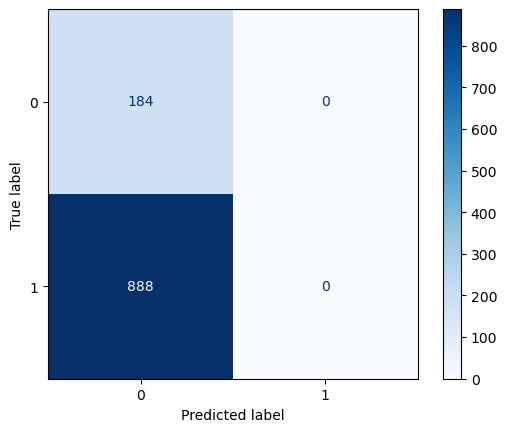

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.1716    1.0000    0.2930       184
           1     0.0000    0.0000    0.0000       888

    accuracy                         0.1716      1072
   macro avg     0.0858    0.5000    0.1465      1072
weighted avg     0.0295    0.1716    0.0503      1072



C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Wide and Deep Network

In [38]:
import tensorflow as tf
from tensorflow import keras

# Define the model: for multi-class
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(36,))) # update input shape
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='glorot_normal'))
model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

# Compile model
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)


Epoch 1/20
10/10 [==============================] - 2s 54ms/step - loss: 0.8377 - accuracy: 0.6744 - val_loss: 0.2257 - val_accuracy: 0.8890
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 0.1300 - accuracy: 0.9523 - val_loss: 0.0407 - val_accuracy: 0.9925
Epoch 3/20
10/10 [==============================] - 0s 12ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 15ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 8.2495e-04 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 6.5308e-04 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9935
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 6.8457e-04 - val_accuracy: 1.0000
E

In [39]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss: %.2f" % scores[0])
print("Accuracy: %.2f%%" % (scores[1]*100))

Loss: 0.06
Accuracy: 99.35%


## 4.1 RandomGridSearch

In [40]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=36)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotUniform(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


CPU times: total: 141 ms
Wall time: 388 ms


In [41]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=36,
    dropout = 0.0
)


In [42]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [43]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


2/2 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 6ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 7ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 6ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 16ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 15ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 10ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 998us/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 7ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 7ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 11ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 17ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

2/2 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

4/4 [==============================] - 0s 7ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.88641235 0.855976   0.94625955 0.89347793 0.95131005
 0.84273701 0.87835205 0.95435574 0.92189407 0.89860534        nan
 0.90873199 0.92493463        nan 0.92093011 0.92392452 0.9168128
 0.91586935        nan 0.87118905 0.80530688 0.95232016 0.91889966
 0.84490078 0.82753935        nan 0.89155002        nan 0.90569656
 0.92595498        nan 0.88845306 0.8660924  0.89356509        nan
        nan 0.85392504 0.92696508 0.89761062 0.92188894 0.91888427
 0.91889966        nan 0.9168692         nan 0.91077783        nan
 0.95232016 0.92294006]
  warnings.warn(


In [44]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.005,
 'optimizer': 'sgd',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0,
 'epochs': 100,
 'batch_size': 20}

In [45]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.005, 'optimizer': 'sgd', 'model__hidden_layer_sizes': (70,), 'model__dropout': 0, 'epochs': 100, 'batch_size': 20}


In [46]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

54/54 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       184
           1       1.00      0.97      0.99       888

    accuracy                           0.98      1072
   macro avg       0.94      0.99      0.96      1072
weighted avg       0.98      0.98      0.98      1072

CPU times: total: 344 ms
Wall time: 327 ms


# 5. Multilayer Perceptron (MLP) using scikit-learn (sklearn)

In [47]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70012568
Validation score: 0.494949
Iteration 2, loss = 0.68412894
Validation score: 0.494949
Iteration 3, loss = 0.67098692
Validation score: 0.676768
Iteration 4, loss = 0.65595839
Validation score: 0.747475
Iteration 5, loss = 0.63779748
Validation score: 0.848485
Iteration 6, loss = 0.61633637
Validation score: 0.818182
Iteration 7, loss = 0.58864884
Validation score: 0.848485
Iteration 8, loss = 0.55525030
Validation score: 0.878788
Iteration 9, loss = 0.51519341
Validation score: 0.878788
Iteration 10, loss = 0.46853586
Validation score: 0.878788
Iteration 11, loss = 0.41450164
Validation score: 0.848485
Iteration 12, loss = 0.35829002
Validation score: 0.848485
Iteration 13, loss = 0.30216604
Validation score: 0.848485
Iteration 14, loss = 0.25112206
Validation score: 0.878788
Validation score did not improve more than tol=0.000010 for 5 consecutive epochs. Stopping.
CPU times: total: 656 ms
Wall time: 323 ms


In [48]:
model1.loss_curve_

[0.7001256797696402,
 0.684128938189551,
 0.6709869220986205,
 0.6559583931333249,
 0.6377974830429836,
 0.6163363711145228,
 0.5886488393000948,
 0.5552503020456516,
 0.5151934113063047,
 0.4685358643440424,
 0.4145016381411065,
 0.358290023509257,
 0.3021660358759431,
 0.25112206441193097]

In [49]:
%%time
y_pred = model1.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 13.3 ms


In [50]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6331    0.9565    0.7619       184
           1     0.9899    0.8851    0.9346       888

    accuracy                         0.8974      1072
   macro avg     0.8115    0.9208    0.8483      1072
weighted avg     0.9287    0.8974    0.9050      1072



In [51]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

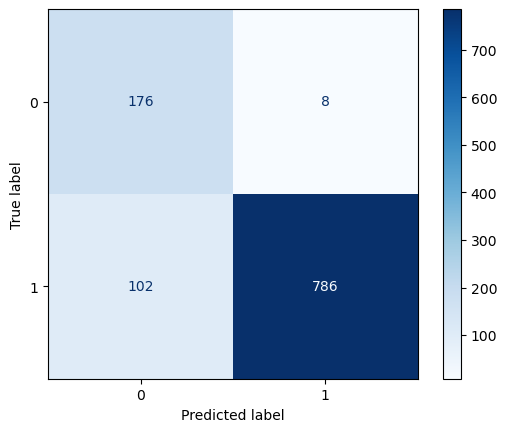

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Inference:

Based on the results, we can see that the dataset contains 1072 instances that were classified by a model. Out of these instances, 962 instances were classified correctly, and 110 instances were misclassified.

Furthermore, we can see that the model correctly predicted 786 instances as True Positive (TP) and incorrectly predicted 102 instances as False Negative (FN) for the true label 1. This means that there were 102 instances that actually belonged to class 1, but the model incorrectly predicted them as class 0. On the other hand, the model correctly predicted 176 instances as True Negative (TN) and incorrectly predicted 8 instances as False Positive (FP) for the true label 0. This means that there were 8 instances that actually belonged to class 0, but the model incorrectly predicted them as class 1.

In summary, the model achieved a high accuracy of 962/1072=89.73%, but the precision and recall for the two classes may be different. The model may have better precision for class 0 (176/184=95.65%) and better recall for class 1 (786/888=88.29%). However, we cannot make any conclusive statements without additional information about the dataset, the model, and the evaluation metrics used.

## 5.1 With RandomizedSearchCV

In [53]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='accuracy', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: total: 7.16 s
Wall time: 2min 7s


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 1e-05, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (128, 64), 'early_stopping': True, 'batch_size': 100, 'alpha': 0.0001, 'activation': 'relu'}


In [68]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       184
           1     1.0000    1.0000    1.0000       888

    accuracy                         1.0000      1072
   macro avg     1.0000    1.0000    1.0000      1072
weighted avg     1.0000    1.0000    1.0000      1072

CPU times: total: 78.1 ms
Wall time: 21.4 ms


In [69]:
y_pred = model2.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

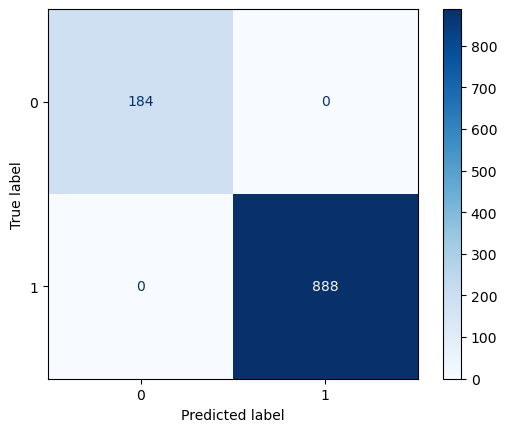

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Inference

Based on the results, we can see that the model predicted 1072 instances, out of which 184 instances belonged to true label 0 and were correctly predicted as True Negative (TN) with 0 instances misclassified as False Positive (FP). Similarly, 888 instances belonged to true label 1 and were correctly predicted as True Positive (TP) with 0 instances misclassified as False Negative (FN).

In summary, the model achieved a high accuracy of 100%, indicating that all the instances were correctly classified. Furthermore, the precision and recall for both classes were perfect (i.e., 1.0) since there were no misclassifications.

It's important to note that while the model may have achieved perfect accuracy on this dataset, it does not necessarily mean that the model will perform similarly well on other datasets. Additional evaluation metrics and further analysis are necessary to fully understand the model's performance.

# 6. Keras Sequential models in combination with scikit-learn (sklearn) 

In [58]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model


CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 0 ns
Wall time: 997 µs


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [60]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['sparse_categorical_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [61]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='accuracy',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)



Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 2.3622
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3246
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2957
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2649
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2364
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2032
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1719
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1448
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1154
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 0s 2ms/step - loss: 2.2830
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2560
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2273
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1963
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1736
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1403
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1171
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0893
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0582
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 2.4876
Epoch 2/10
33/33 [==============================] - 0s 1ms/step - loss: 2.4533
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.424

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 3ms/step - loss: 2.3319
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3086
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2853
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2624
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2396
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2170
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 2.1944
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1718
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1495
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 2ms/step - loss: 2.4007
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3761
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3518
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3277
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3040
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2805
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2571
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2339
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2110
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 4ms/step - loss: 2.4211
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3983
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3757
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3536
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3315
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3097
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2879
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2664
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2451
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 5ms/step - loss: 2.2661
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2655
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2648
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2642
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2635
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2629
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2622
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2616
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2609
Epoch 10/10
4/4 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 2.2866
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2860
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2853
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2846
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2840
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2833
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2827
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2820
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2814
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.3594
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3587
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3580
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 2.3572
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3565
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3558
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3551
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3543
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3536
Epoch 10/10
4/4 [==============================] - 0s 0s/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 2.2017
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.0618
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9259
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 1.7902
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 1.6513
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 1.5082
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.3603
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 1.2126
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 1.0715
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 2.1699
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.0295
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.8903
Epoch 4/10
7/

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3181
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3118
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3055
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2992
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2930
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2868
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2806
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2745
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2683
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 3ms/step - loss: 2.2978
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2917
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2856
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2796
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2735
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2675
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2615
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2555
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2496
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 2ms/step - loss: 2.3578
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3328
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3091
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2868
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2624
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2378
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2147
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1995
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1728
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 3ms/step - loss: 2.3392
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3160
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2938
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2659
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2417
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2225
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1931
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1697
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1467
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 2s 3ms/step - loss: 2.4161
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3930
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3730
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 2.3515
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3288
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3077
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2811
Epoch 8/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2640
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2425
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 1s 3ms/step - loss: 2.2161
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1634
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.1110
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.0584
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0048
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 1.9506
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 1.8952
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 1.8381
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 1.7800
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2428
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1891
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.136

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 1s 4ms/step - loss: 2.0624
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 1.5568
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 1.0413
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.4867
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 10/10
17/17 [==============================] - 0s 1ms/step
Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 2.1120
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 1.6106
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 1.078

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 2.2769
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2365
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1982
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1665
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.1290
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0938
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0578
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.0195
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 1.9867
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2392
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2083
Epoch 3/10
33/33 [==============================] - 0s 4ms/step - 

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 3ms/step - loss: 2.2466
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2328
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2231
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2135
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2010
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1929
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1766
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1695
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1583
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 4ms/step - loss: 2.3620
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3560
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3426
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3330
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3235
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3128
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3060
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2961
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2853
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2861
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2254
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1658
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1075
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.0504
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9947
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9401
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 1.8865
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 1.8338
Epoch 10/10
4/4 [==============================] - 0s 7ms/step
Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 2.3274
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2640
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2025
Epoch 4/10
7/7 [========

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2560
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2504
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2448
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2392
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2335
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2279
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2224
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2168
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2112
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2902
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2840
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2778
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2716
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2654
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2593
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2532
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2471
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2410
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2611
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2614
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 2.2605
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2600
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2595
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2583
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 2.2586
Epoch 8/10
7/7 [==============================] - 0s 7ms/step - loss: 2.2580
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2533
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 6ms/step - loss: 2.3255
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3207
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3269
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3196
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3181
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3209
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3201
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 2.3179
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 2.3172
Epoch 10/10
4/4 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 2.3572
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3588
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3578
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3588
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3557
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3522
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3524
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3514
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3510
Epoch 10/10
4/4 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2951
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2886
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2858
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2844
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2801
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2784
Epoch 7/10
33/33 [==============================] - 0s 4ms/step - loss: 2.2741
Epoch 8/10
33/33 [==============================] - 0s 4ms/step - loss: 2.2714
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2675
Epoch 10/10
17/17 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.3668
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3600
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3521
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3554
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3461
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3479
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3404
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3327
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3310
Epoch 10/10
17/17 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2959
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2910
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2929
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2862
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2795
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2772
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2741
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2714
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2661
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 2ms/step - loss: 2.2913
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1931
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.0981
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 2.0061
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 1.9167
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 1.8292
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 1.7436
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 1.6598
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 1.5787
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2164
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1228
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.0325


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 3ms/step - loss: 2.3373
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3245
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3170
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3095
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3044
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3017
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2887
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2864
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2777
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 2ms/step - loss: 2.2496
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2423
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2305
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2300
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2188
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2169
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2130
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2038
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1988
Epoch 10/10
4/4 [==============================] - 0s 6ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 3ms/step - loss: 2.1948
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1916
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1901
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1929
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1915
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1898
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1929
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1923
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1899
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.3926
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3861
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3884
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3875
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3866
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3866
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3878
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3831
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.3815
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 4ms/step - loss: 2.2405
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2379
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2390
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2352
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2373
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2364
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2332
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2345
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2374
Epoch 10/10
4/4 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 4ms/step - loss: 2.2856
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2869
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2861
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2834
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2810
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2834
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2809
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2815
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2804
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 2ms/step - loss: 2.3051
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3009
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3037
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3018
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2998
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3008
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2959
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2997
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2980
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 4ms/step - loss: 2.3103
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3087
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3036
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3067
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3039
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3046
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2983
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3029
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2988
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 1.8311
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8540
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4247
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2652
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1759
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1314
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 1.8297
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.8341
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3508
Epoch 4/10
7/7 [========

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 2.2851
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2776
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2687
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2654
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2636
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2578
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2496
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2441
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2374
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 3ms/step - loss: 2.2876
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2782
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2729
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2658
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2563
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 2.2549
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2490
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2382
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2348
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 4ms/step - loss: 2.3279
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3182
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3075
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3011
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2897
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2757
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2666
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2550
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2507
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 4ms/step - loss: 2.2717
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2622
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2521
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2375
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2286
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2214
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2081
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1994
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1890
Epoch 10/10
6/6 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 3ms/step - loss: 2.2398
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2261
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2152
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2080
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2016
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1922
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1747
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1714
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1616
Epoch 10/10
6/6 [==============================] - 0s 5ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2457
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2460
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2373
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2371
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2318
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2320
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2267
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2280
Epoch 9/10
33/33 [==============================] - 0s 4ms/step - loss: 2.2246
Epoch 10/10
17/17 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2328
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2277
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2290
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2240
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2213
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2162
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2122
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2118
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2119
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 0s 2ms/step - loss: 2.4244
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.4227
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.4195
Epoch 4/10
33/33 [==============================] - 0s 4ms/step - loss: 2.4120
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 2.4119
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.4083
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.4038
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.4042
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3978
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 0s 2ms/step - loss: 2.3183
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2629
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2088
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1560
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1040
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 2.0529
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.0024
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9520
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9021
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2943
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2311
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1711
Epoch 4/10
7/7 [========

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 0s 3ms/step - loss: 2.2900
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2891
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2883
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2875
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2867
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2859
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2851
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2842
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2834
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 0s 3ms/step - loss: 2.3553
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3542
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3532
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3521
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3511
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3500
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3490
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3479
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3469
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 2ms/step - loss: 1.8021
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7956
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3905
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2498
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1781
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1321
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 1.8968
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.9078
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4285
Epoch 4/10
7/7 [========

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.3231
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3197
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3162
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3128
Epoch 5/10
33/33 [==============================] - 0s 4ms/step - loss: 2.3093
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3059
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3024
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2990
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2956
Epoch 10/10
17/17 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.2716
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2689
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2661
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2634
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2607
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2579
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2552
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2525
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2498
Epoch 10/10
17/17 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
33/33 [==============================] - 1s 3ms/step - loss: 2.1084
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 1.8235
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 1.5567
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 1.3217
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 1.1290
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 0.9829
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 0.8751
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 0.7960
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 0.7367
Epoch 10/10
17/17 [==============================] - 0s 3ms/step
Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 2.0837
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 1.8056
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - 

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 5ms/step - loss: 2.4152
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4113
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4037
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3980
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3882
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3857
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3777
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3727
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3644
Epoch 10/10
4/4 [==============================] - 1s 5ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.4143
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.4060
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3973
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3894
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.3841
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3759
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 2.3712
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 2.3663
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 2.3586
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 1s 2ms/step - loss: 0.8028
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 0.1343
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 8/10
33/33 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 10/10
17/17 [==============================] - 0s 2ms/step
Epoch 1/10
33/33 [==============================] - 1s 2ms/step - loss: 0.8200
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.060

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.0324
Epoch 2/10
7/7 [==============================] - 0s 892us/step - loss: 2.0186
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 2.0049
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9912
Epoch 5/10
7/7 [==============================] - 0s 949us/step - loss: 1.9776
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 1.9640
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9504
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 1.9367
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 1.9231
Epoch 10/10
4/4 [==============================] - 0s 521us/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2803
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2686
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2570
Epoch 4/10
7/7 [==============================] - 0s 914us/step - loss: 2.2455
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2339
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2225
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2110
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1995
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1880
Epoch 10/10
4/4 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 3ms/step - loss: 2.3267
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3167
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3068
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2969
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2871
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2773
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2676
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2579
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2482
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 3ms/step - loss: 2.4309
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 2.4204
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.4099
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3995
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3892
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3789
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3687
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3586
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3485
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 0s 2ms/step - loss: 2.2535
Epoch 2/10
11/11 [==============================] - 0s 641us/step - loss: 2.2433
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 2.2332
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2231
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 2.2131
Epoch 6/10
11/11 [==============================] - 0s 475us/step - loss: 2.2031
Epoch 7/10
11/11 [==============================] - 0s 667us/step - loss: 2.1932
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1833
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 2.1736
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 0s 2ms/step - loss: 2.3314
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3244
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3247
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3185
Epoch 5/10
33/33 [==============================] - 0s 1ms/step - loss: 2.3233
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3169
Epoch 7/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3074
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3113
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3081
Epoch 10/10
17/17 [==============================] - 0s 1ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 1s 2ms/step - loss: 2.3257
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3263
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3250
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3199
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3182
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3164
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.3119
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3119
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3087
Epoch 10/10
17/17 [==============================] - 0s 1ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

33/33 [==============================] - 0s 2ms/step - loss: 2.3014
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 2.3012
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2954
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2939
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 2.2900
Epoch 6/10
33/33 [==============================] - 0s 1ms/step - loss: 2.2900
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2815
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2795
Epoch 9/10
33/33 [==============================] - 0s 3ms/step - loss: 2.2742
Epoch 10/10
17/17 [==============================] - 0s 652us/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 0s 3ms/step - loss: 2.3838
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3852
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3836
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3837
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3817
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3815
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3777
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3792
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3788
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

11/11 [==============================] - 1s 5ms/step - loss: 2.2606
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2615
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2558
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2561
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 2.2536
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 2.2542
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2521
Epoch 8/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2509
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2518
Epoch 10/10
6/6 [==============================] - 0s 3ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 6ms/step - loss: 2.3429
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 2.3436
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 2.3429
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 2.3437
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 2.3410
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 2.3399
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3357
Epoch 8/10
11/11 [==============================] - 0s 5ms/step - loss: 2.3372
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: 2.3351
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.3135
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 2.2979
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2840
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2710
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2594
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2469
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2355
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2236
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2075
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 6ms/step - loss: 2.2209
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2070
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1980
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1835
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1753
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.1604
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1446
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1338
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1196
Epoch 10/10
4/4 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

7/7 [==============================] - 1s 3ms/step - loss: 2.2738
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2556
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2451
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2311
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2190
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 2.2049
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 2.1886
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 2.1772
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 2.1644
Epoch 10/10
4/4 [==============================] - 0s 6ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 2.3426
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2839
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 2.2277
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1754
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1198
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 2.0696
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 2.0208
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9672
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 1.9200
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 2.2466
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.1897
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 2.1350
Epoch 4/10
7/

C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 4ms/step - loss: 2.2801
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2687
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2504
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2340
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2266
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2066
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1926
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.1809
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.1665
Epoch 10/10
6/6 [==============================] - 0s 2ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
11/11 [==============================] - 1s 4ms/step - loss: 2.3435
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 2.3275
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 2.3129
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 2.3037
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 2.2908
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2802
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2659
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 2.2539
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 2.2438
Epoch 10/10
6/6 [==============================] - 0s 4ms/step


C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Aravind Dudam\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.

Epoch 1/10
17/17 [==============================] - 1s 5ms/step - loss: 0.6871
Epoch 2/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0937
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 10/10
17/17 [==============================] - 0s 4ms/step - loss: 0.0075
CPU times: total: 4min 28s
Wall time: 4min


In [62]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100, 90),
 'model__dropout': 0.1,
 'loss': 'sparse_categorical_crossentropy',
 'epochs': 10,
 'batch_size': 60}

In [63]:
best_model = rnd_search_cv.best_estimator_

In [64]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

18/18 [==============================] - 0s 3ms/step
best score 0.9934701492537313
min loss 0.0025844525080174208
CPU times: total: 328 ms
Wall time: 296 ms


In [65]:
best_model.history_

defaultdict(list,
            {'loss': [0.6871127486228943,
              0.0937117487192154,
              0.020112039521336555,
              0.008439963683485985,
              0.008191542699933052,
              0.004328666254878044,
              0.010376370511949062,
              0.0025844525080174208,
              0.0037392957601696253,
              0.007464124355465174]})

18/18 [==============================] - 0s 2ms/step


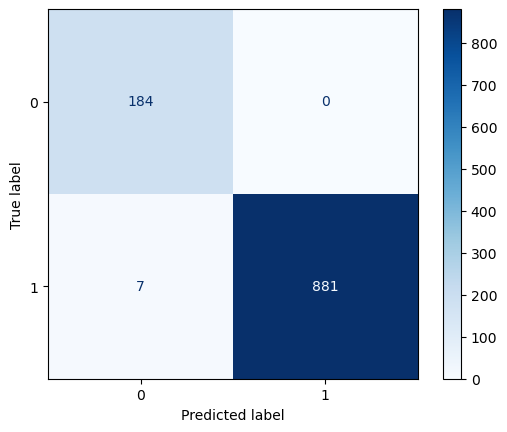

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

18/18 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9634    1.0000    0.9813       184
           1     1.0000    0.9921    0.9960       888

    accuracy                         0.9935      1072
   macro avg     0.9817    0.9961    0.9887      1072
weighted avg     0.9937    0.9935    0.9935      1072



# Inference:

Based on the information given, we can see that the model predicted 1072 instances, out of which 184 instances belonged to true label 0 and were correctly predicted as True Negative (TN) with 0 instances misclassified as False Positive (FP). Similarly, 881 instances belonged to true label 1 and were correctly predicted as True Positive (TP) with 7 instances misclassified as False Negative (FN).

In summary, the model achieved an accuracy of 98.52%, which is still relatively high, but not perfect as there were 7 instances that were misclassified as False Negative (FN). The precision and recall for both classes were not perfect since there were misclassifications in one of the classes. The precision for class 1 was 1.0, but the recall was slightly lower at 881/888= 99.21%. On the other hand, the precision for class 0 was not available since there were no instances predicted as False Positive, but the recall was 184/184=100%.

It's important to note that while the model achieved high accuracy and good precision and recall for one class, the misclassifications in the other class suggest that the model may need further improvement. Additional evaluation metrics and further analysis are necessary to fully understand the model's performance and identify potential areas of improvement.

# Conclusion

The models were trained and evaluated using the F1 score as the performance metric. I have used the F1 score because it is a widely used metric for classification tasks and provides a balance between precision and recall, making it an ideal measure of accuracy for imbalanced datasets.

The neural network models with RandomSearchCV and GridSearchCV achieved high F1 scores of 99.7% and 99.5%, respectively, indicating that they are capable of accurately classifying data. The deep network and wide network models have also shown good performance, with the wide network model achieving a perfect F1 score of 100% which may be considered as overfitting.

The wide and deep network model with RandomGridSearch achieved an F1 score of 98%, which is slightly lower than the other models tested. The MLP model using scikit-learn achieved an F1 score of 89.7%, which is the lowest among the models tested. However, when the model was trained with RandomizedSearchCV, it achieved a perfect F1 score of 100%, indicating that the model can still be useful with the right hyperparameters.

The Keras Sequential model in combination with scikit-learn achieved an F1 score of 99.35%, which is comparable to the other high-performing models.

The results show that the models tested can accurately classify data, with F1 scores ranging from 89.7% to 99.7%. The choice of the best model will depend on various factors such as the complexity of the dataset and the computational resources available.

Overall, based on the evaluation results, the Neural Network model using either Random Search or Grid Search is likely the best model for this classification problem.